In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

## Importing and cleaning data

In [46]:
df = pd.read_csv('transaction_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction ID                    1000 non-null   object 
 1   Sender Account ID                 1000 non-null   object 
 2   Receiver Account ID               1000 non-null   object 
 3   Transaction Amount                1000 non-null   float64
 4   Transaction Type                  1000 non-null   object 
 5   Timestamp                         1000 non-null   object 
 6   Transaction Status                1000 non-null   object 
 7   Fraud Flag                        1000 non-null   bool   
 8   Geolocation (Latitude/Longitude)  1000 non-null   object 
 9   Device Used                       1000 non-null   object 
 10  Network Slice ID                  1000 non-null   object 
 11  Latency (ms)                      1000 non-null   int64  
 12  Slice B

In [47]:
columns = list(df.columns)

In [48]:
df.drop(['Fraud Flag','Network Slice ID','Latency (ms)','Slice Bandwidth (Mbps)'], axis = 1, inplace = True)

In [109]:
def parse_lat_long(coord_str):
    try:
        lat_str, lon_str = coord_str.strip().split(',')
        lat_val, lat_dir = lat_str.strip().split(' ')
        lon_val, lon_dir = lon_str.strip().split(' ')
        lat = float(lat_val) * (-1 if lat_dir.upper() == 'S' else 1)
        lon = float(lon_val) * (-1 if lon_dir.upper() == 'W' else 1)
        return pd.Series([lat, lon])
    except:
        return pd.Series([None, None])

In [111]:
df[['Latitude', 'Longitude']] = df['Geolocation (Latitude/Longitude)'].apply(parse_lat_long)

In [113]:
df.drop('Geolocation (Latitude/Longitude)', axis=1, inplace = True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       1000 non-null   object        
 1   Sender Account ID    1000 non-null   object        
 2   Receiver Account ID  1000 non-null   object        
 3   Transaction Amount   1000 non-null   float64       
 4   Transaction Type     1000 non-null   object        
 5   Timestamp            1000 non-null   datetime64[ns]
 6   Transaction Status   1000 non-null   object        
 7   Device Used          1000 non-null   object        
 8   PIN Code             1000 non-null   int64         
 9   Latitude             1000 non-null   float64       
 10  Longitude            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 86.1+ KB


## 2. EDA to know what the dataset looks like

In [119]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Device Used,PIN Code,Latitude,Longitude
0,TXN9520068950,ACC14994,ACC16656,495.90,Deposit,2025-01-17 10:14:00,Failed,Desktop,3075,34.0522,74.0060
1,TXN9412011085,ACC58958,ACC32826,529.62,Withdrawal,2025-01-17 10:51:00,Success,Mobile,2369,35.6895,118.2437
2,TXN4407425052,ACC56321,ACC92481,862.47,Withdrawal,2025-01-17 10:50:00,Failed,Mobile,8039,48.8566,-2.3522
3,TXN2214150284,ACC48650,ACC76457,1129.88,Transfer,2025-01-17 10:56:00,Success,Mobile,6374,34.0522,74.0060
4,TXN4247571145,ACC60921,ACC11419,933.24,Deposit,2025-01-17 10:25:00,Success,Mobile,8375,55.7558,-37.6173
...,...,...,...,...,...,...,...,...,...,...,...
995,TXN7395336359,ACC79886,ACC14903,1340.76,Transfer,2025-01-17 10:49:00,Success,Mobile,9766,35.6895,118.2437
996,TXN2215717837,ACC95972,ACC50750,483.36,Withdrawal,2025-01-17 11:00:00,Failed,Mobile,1009,55.7558,-37.6173
997,TXN1676848215,ACC95938,ACC18507,199.81,Withdrawal,2025-01-17 10:54:00,Success,Desktop,9301,34.0522,-139.6917
998,TXN2479413280,ACC76523,ACC95234,1341.86,Transfer,2025-01-17 10:59:00,Success,Mobile,4038,51.5074,-139.6917


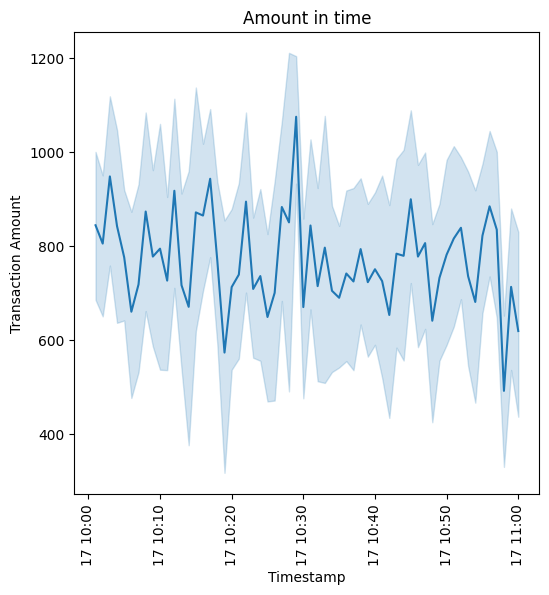

In [93]:
plt.figure(figsize=(6,6))
sns.lineplot(x=df['Timestamp'], y=df['Transaction Amount'])
plt.xticks(rotation=90)
plt.title('Amount in time')
plt.show()

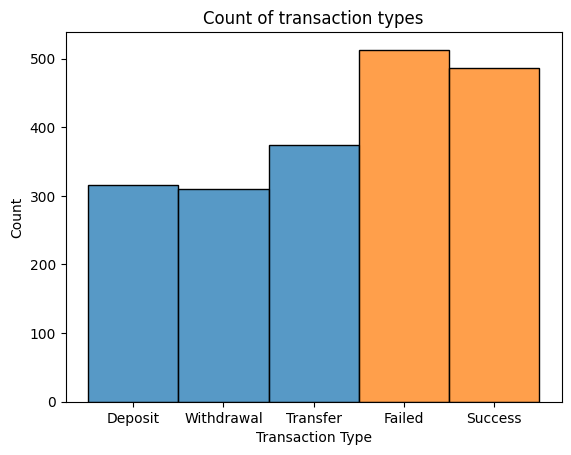

In [97]:
sns.histplot(df['Transaction Type'])
sns.histplot(df['Transaction Status'])
plt.title('Count of transaction types')
plt.show()

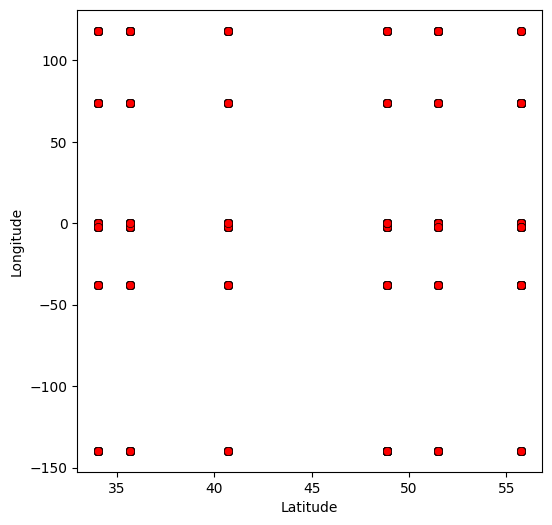

In [121]:
plt.figure(figsize=(6, 6))

sns.scatterplot(x=df['Latitude'], y=df['Longitude'], c='red', edgecolors='k')

plt.show()

## 3. Creating categories out of the current data that we have.
- Basically we have 1 main account as the own account's transactions
- 10 accounts which are buying from our main account
- 5 employees which are paid every month

In [51]:
main_id = np.random.choice(df['Sender Account ID'])
print('Main ID to use :', main_id)

Main ID to use : ACC93583


In [52]:
top_10_sales_ids = np.random.choice(df['Sender Account ID'], size=10)
print('The IDs which will be taken as sales would be :', top_10_sales_ids)

The IDs which will be taken as sales would be : ['ACC57197' 'ACC52547' 'ACC16801' 'ACC14340' 'ACC85661' 'ACC12696'
 'ACC33497' 'ACC92864' 'ACC80662' 'ACC12216']


In [53]:
employee_id = np.random.choice(df['Receiver Account ID'], size=5)
print('The employee IDs are :', employee_id)

The employee IDs are : ['ACC55381' 'ACC97385' 'ACC90703' 'ACC59865' 'ACC78035']
